In [ ]:
%run task2a.ipynb #Substitute for importing from task2a.py, since we use notebooks instead
import numpy as np
import utils
import matplotlib.pyplot as plt
#from task2a.py import cross_entropy_loss, BinaryModel, pre_process_images
from trainer import BaseTrainer
np.random.seed(0)

Train shape: X: (3657, 784), Y: (3657, 1)
Validation shape: X: (415, 784), Y: (415, 1)


In [ ]:
def calculate_accuracy(X: np.ndarray, targets: np.ndarray, model: BinaryModel) -> float:
    """
    Args:
        X: images of shape [batch size, 785]
        targets: labels/targets of each image of shape: [batch size, 1]
        model: model of class BinaryModel
    Returns:
        Accuracy (float)
    """
    # TODO Implement this function (Task 2c)
    y_hat = model.forward(X)
    y_hat[y_hat>=0.5] = 1  #replace all elements where y_hat >= 0.5 with 1
    y_hat[y_hat<0.5] = 0   #replace all elements where y_hat < 0.5 with 0
    correct = np.count_nonzero(y_hat==targets)
    accuracy = correct/targets.shape[0] #Number of correct predictions/total number of predictions
    return accuracy

In [ ]:
class LogisticTrainer(BaseTrainer):

    def train_step(self, X_batch: np.ndarray, Y_batch: np.ndarray):
        """
        Perform forward, backward and gradient descent step here.
        The function is called once for every batch (see trainer.py) to perform the train step.
        The function returns the mean loss value which is then automatically logged in our variable self.train_history.

        Args:
            X: one batch of images
            Y: one batch of labels
        Returns:
            loss value (float) on batch
        """
        # TODO: Implement this function (task 2b)
        loss = 0
        y_hat = self.model.forward(X_batch)
        self.model.backward(X_batch, y_hat, Y_batch)
        self.model.w -= self.learning_rate*self.model.grad
        loss = cross_entropy_loss(Y_batch, y_hat)
        return loss

    def validation_step(self):
        """
        Perform a validation step to evaluate the model at the current step for the validation set.
        Also calculates the current accuracy of the model on the train set.
        Returns:
            loss (float): cross entropy loss over the whole dataset
            accuracy_ (float): accuracy over the whole dataset
        Returns:
            loss value (float) on batch
            accuracy_train (float): Accuracy on train dataset
            accuracy_val (float): Accuracy on the validation dataset
        """
        # NO NEED TO CHANGE THIS FUNCTION
        logits = self.model.forward(self.X_val)
        loss = cross_entropy_loss(Y_val, logits)

        accuracy_train = calculate_accuracy(
            X_train, Y_train, self.model)
        accuracy_val = calculate_accuracy(
            X_val, Y_val, self.model)
        return loss, accuracy_train, accuracy_val


Train shape: X: (3596, 784), Y: (3596, 1)
Validation shape: X: (403, 784), Y: (403, 1)
(3596, 1)
Early stop at  19 epochs
Final Train Cross Entropy Loss: 0.07542426129199684
Final Validation Cross Entropy Loss: 0.05713670711129877
Train accuracy: 0.9774749721913237
Validation accuracy: 0.9751861042183623
108


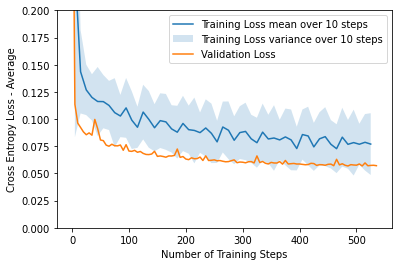

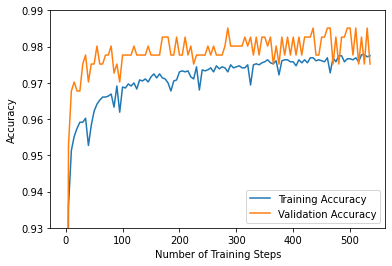

Early stop at  17 epochs


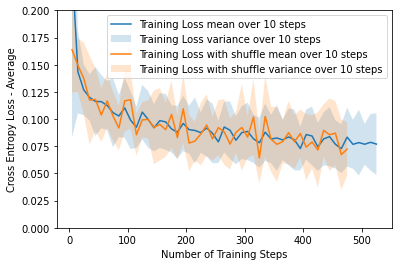

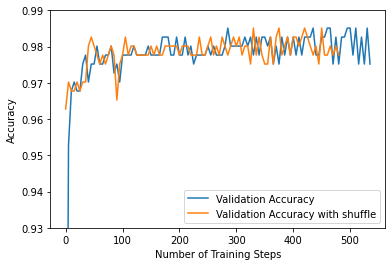

In [ ]:
if __name__ == "__main__":
    # hyperparameters DO NOT CHANGE IF NOT SPECIFIED IN ASSIGNMENT TEXT
    num_epochs = 500
    learning_rate = 0.05
    batch_size = 128
    shuffle_dataset = False

    # Load dataset
    category1, category2 = 2, 3
    X_train, Y_train, X_val, Y_val = utils.load_binary_dataset(
        category1, category2)
    print(Y_train.shape)
    X_train = pre_process_images(X_train)
    X_val = pre_process_images(X_val)

    # ANY PARTS OF THE CODE BELOW THIS CAN BE CHANGED.

    # Intialize model
    model = BinaryModel()
    # Train model
    trainer = LogisticTrainer(
        model, learning_rate, batch_size, shuffle_dataset,
        X_train, Y_train, X_val, Y_val,
    )
    train_history, val_history = trainer.train(num_epochs)

    # Plot and print everything you want of information

    print("Final Train Cross Entropy Loss:",
          cross_entropy_loss(Y_train, model.forward(X_train)))
    print("Final Validation Cross Entropy Loss:",
          cross_entropy_loss(Y_val, model.forward(X_val)))
    print("Train accuracy:", calculate_accuracy(X_train, Y_train, model))
    print("Validation accuracy:", calculate_accuracy(X_val, Y_val, model))
    
    # Plot loss for first model (task 2b)
    plt.ylim([0., .2])
    utils.plot_loss(train_history["loss"],
                    "Training Loss", npoints_to_average=10) 
    utils.plot_loss(val_history["loss"], "Validation Loss")
    print(len(val_history["loss"]))
    plt.legend()
    plt.xlabel("Number of Training Steps")
    plt.ylabel("Cross Entropy Loss - Average")
    plt.savefig("task2b_binary_train_loss.png")
    plt.show()

    # Plot accuracy
    plt.ylim([0.93, .99])
    utils.plot_loss(train_history["accuracy"], "Training Accuracy")
    utils.plot_loss(val_history["accuracy"], "Validation Accuracy")
    plt.xlabel("Number of Training Steps")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig("task2b_binary_train_accuracy.png")
    plt.show()

    # Task 2e - Create a comparison between training with and without shuffling
    shuffle_dataset = True
    # Intialize model
    model = BinaryModel()
    # Train model
    trainer = LogisticTrainer(
        model, learning_rate, batch_size, shuffle_dataset,
        X_train, Y_train, X_val, Y_val,
    )
    train_history_shuffle, val_history_shuffle = trainer.train(num_epochs)

    plt.ylim([0., .2])
    utils.plot_loss(train_history["loss"],
                    "Training Loss", npoints_to_average=10)
    utils.plot_loss(
        train_history_shuffle["loss"], "Training Loss with shuffle", npoints_to_average=10)
    plt.legend()
    plt.xlabel("Number of Training Steps")
    plt.ylabel("Cross Entropy Loss - Average")
    plt.savefig("task2e_train_loss_with_shuffle.png")
    plt.show()

    plt.ylim([0.93, .99])
    utils.plot_loss(val_history["accuracy"], "Validation Accuracy")
    utils.plot_loss(
        val_history_shuffle["accuracy"], "Validation Accuracy with shuffle")
    plt.xlabel("Number of Training Steps")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig("task2e_train_accuracy_shuffle_difference.png")
    plt.show()
    

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fc7fa119-6ed4-4d50-aa34-54bc46270896' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>